In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_evaluation.csv')

In [3]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [5]:
df.columns = ['buying','maintenance','doors','persons','luggage','safety','class']

In [6]:
df

,buying,maintenance,doors,persons,luggage,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [7]:
df['buying'].value_counts()

low      432
high     432
med      432
vhigh    431
Name: buying, dtype: int64

In [8]:
df['maintenance'].value_counts()

low      432
high     432
med      432
vhigh    431
Name: maintenance, dtype: int64

In [9]:
df['doors'].value_counts()

3        432
5more    432
4        432
2        431
Name: doors, dtype: int64

In [10]:
df['persons'].value_counts()

more    576
4       576
2       575
Name: persons, dtype: int64

In [11]:
df['luggage'].value_counts()

med      576
big      576
small    575
Name: luggage, dtype: int64

In [12]:
df['safety'].value_counts()

high    576
med     576
low     575
Name: safety, dtype: int64

In [13]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [14]:
x = df.drop('class',axis=1)

In [15]:
x

,buying,maintenance,doors,persons,luggage,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [16]:
y = df['class']

In [17]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
X_train

,buying,maintenance,doors,persons,luggage,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low
...,...,...,...,...,...,...
1130,med,med,3,more,big,low
1294,med,low,5more,more,big,high
860,high,low,5more,more,big,low
1459,low,high,4,2,small,high


In [21]:
X_test

,buying,maintenance,doors,persons,luggage,safety
599,high,high,4,2,big,low
932,med,vhigh,4,4,big,low
628,high,high,5more,2,big,high
1497,low,high,5more,4,med,med
1262,med,low,4,more,med,low
...,...,...,...,...,...,...
490,high,vhigh,4,2,med,high
1276,med,low,5more,2,big,high
287,vhigh,med,4,more,small,low
701,high,med,4,2,small,low


In [22]:
y_train

1177    vgood
585     unacc
1551      acc
727       acc
707     unacc
        ...  
1130    unacc
1294    vgood
860     unacc
1459    unacc
1126      acc
Name: class, Length: 1208, dtype: object

In [23]:
y_test

599     unacc
932     unacc
628     unacc
1497      acc
1262    unacc
        ...  
490     unacc
1276    unacc
287     unacc
701     unacc
1713     good
Name: class, Length: 519, dtype: object

In [24]:
X_train.dtypes

buying         object
maintenance    object
doors          object
persons        object
luggage        object
safety         object
dtype: object

In [25]:
X_train.columns

Index(['buying', 'maintenance', 'doors', 'persons', 'luggage', 'safety'], dtype='object')

In [26]:
import category_encoders as ce

In [27]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maintenance', 'doors', 'persons', 'luggage', 'safety'])

In [28]:
encoder

OrdinalEncoder(cols=['buying', 'maintenance', 'doors', 'persons', 'luggage',
                     'safety'])

In [29]:
X_train = encoder.fit_transform(X_train)

/home/punit/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [30]:
X_train

,buying,maintenance,doors,persons,luggage,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3
...,...,...,...,...,...,...
1130,1,1,2,2,1,3
1294,1,4,1,2,1,1
860,2,4,1,2,1,3
1459,3,2,3,3,2,1


In [31]:
X_test = encoder.fit_transform(X_test)

/home/punit/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [32]:
X_test

,buying,maintenance,doors,persons,luggage,safety
599,2,2,3,3,1,3
932,1,3,3,1,1,3
628,2,2,1,3,1,1
1497,3,2,1,1,3,2
1262,1,4,3,2,3,3
...,...,...,...,...,...,...
490,2,3,3,3,3,1
1276,1,4,1,3,1,1
287,4,1,3,2,2,3
701,2,1,3,3,2,3


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(random_state=0)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [36]:
y_pred = rfc.predict(X_test)

In [37]:
y_pred

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'vgood', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
    

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print('Model Score is ',accuracy_score(y_test,y_pred))

Model Score is  0.928709055876686


In [40]:
from sklearn.tree import DecisionTreeClassifier

gini_model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

gini_model.fit(X_train,y_train)

print('Model Score using gini impurity',accuracy_score(y_test,y_pred))

In [44]:
from sklearn.tree import plot_tree

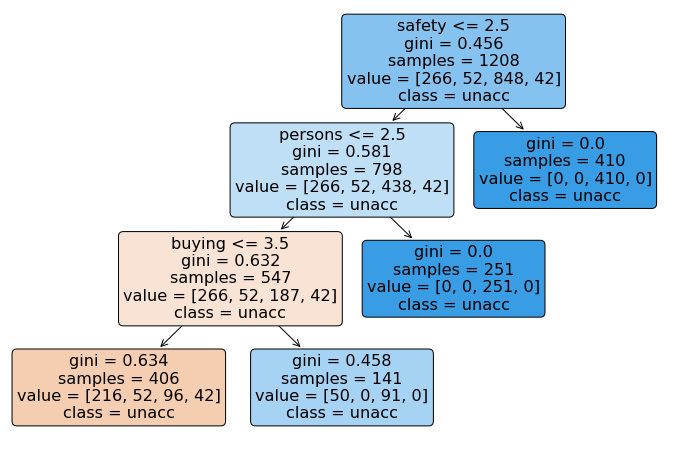

In [49]:
plt.figure(figsize=(12,8))
plot_tree(gini_model,feature_names=X_train.columns,class_names=y_train,filled=True,rounded=True)
plt.show()

In [46]:
X_train.head()

,buying,maintenance,doors,persons,luggage,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


In [50]:
from sklearn.tree import DecisionTreeClassifier

gini_model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)

gini_model.fit(X_train,y_train)

print('Model Score using gini impurity',accuracy_score(y_test,y_pred))

Model Score using gini impurity 0.928709055876686


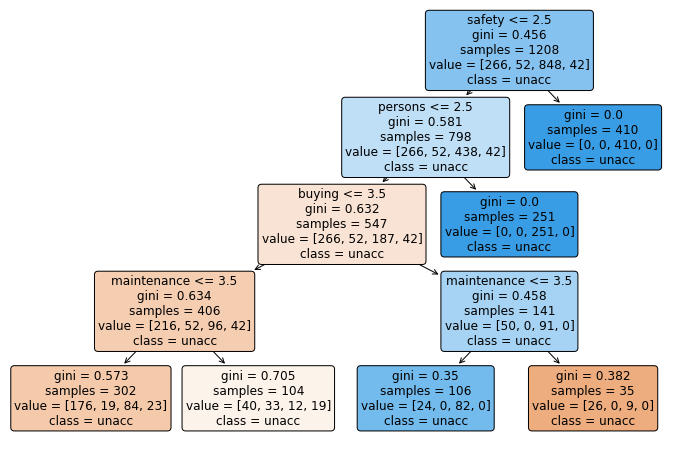

In [51]:
plt.figure(figsize=(12,8))
plot_tree(gini_model,feature_names=X_train.columns,class_names=y_train,filled=True,rounded=True)
plt.show()